# Development and Validation of an Adaptive Machine Learning Pipeline for Cardiovascular Disease Risk Prediction

### Background:
The primary cause of morbidity and mortality worldwide is cardiovascular disease (CVD). Brunei Darussalam is no exception; CVDs were the leading cause of death in 2015. Therefore, CVDs have substantial effects on public health and will eventually impair Brunei's economically productive workforce. In Brunei, the sole recommended technique for assessing CVD risk is the WHO/ISH risk prediction chart, which has not been validated in the local population. During the COVID-19 pandemic, MOH Brunei Darussalam developed the BruHealth mobile application on a digital platform with several essential features that have a significant impact on the general public's health. 

### Methods: 
A Supervised Classification Machine Learning Problem using standard libraries and modules in the Python3 environment and the TensorFlow backend since **an Adaptive AI predictive modelling pipeline of machine learning algorithms** will be developed and validated using open source CVD risk data collated from the literature and then will be tested by local Bruneian CVD risk data and then will be continuously updated and adapted with the prospectively populated CVD risk data through BruHealth national mobile application.

### Objectives
1. To develop an Adaptive pipeline of different ML and DL algorithms for predicting the risk of the future CVD events and tested by Brunei-specific CVD risk data.
2. To estimate the accuracy, sensitivity (recall), specificity, positive predictive value (precision), area under the ROC curve (AUC ROC), the area under the precision-recall curve (AUC PR) and F1 score of the developed ML/DL algorithms pipeline.
3. To compare and prioritize the performance of the different ML/DL classifiers used in developing this automated CVD risk calculator using calculated metrics using an internal validation by splitting the data into training and validation dataset and an external testing by local Bruneian CVD risk data.

## Data collection & Preprocessing for Local Bruneian dataset for External Validation


## Importing Libraries


In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
import random
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading and converting the data into a pandas dataframe
Brunei_df = pd.read_excel(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Local validation dataset/FW__SCORE2-Asia_/STEPS 2015 Brunei dataset.xlsx")

# Informtion about the raw dataset
Brunei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   age         1000 non-null   float64
 2   sex         1000 non-null   int64  
 3   chol        1000 non-null   float64
 4   hdl         1000 non-null   float64
 5   cursmok     1000 non-null   int64  
 6   sbp         1000 non-null   float64
 7   dm          1000 non-null   int64  
 8   klinman     1000 non-null   int64  
 9   evcom_n     1000 non-null   int64  
 10  edood_n     1000 non-null   int64  
 11  evcom_f     1000 non-null   float64
 12  comp.event  1000 non-null   int64  
 13  edoodvas    1000 non-null   int64  
 14  edood_f     1000 non-null   float64
dtypes: float64(6), int64(9)
memory usage: 117.3 KB


In [3]:
# Checking Missing values in the dataset

num_Missing_values_Brunei= Brunei_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_Brunei, '\n')

# Checking dupicated values in the dataset
duplicates_Brunei = Brunei_df.duplicated().sum()
if duplicates_Brunei:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_Brunei))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Dataset contains no Duplicate Values


##  1. Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure** |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| Tot_Chol_mmol/l | **(float) Total cholesterol by mmol/l** | 
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [4]:
# define variable columns based on lab-based CVD screening strategy
Brunei_df = Brunei_df.loc[:,['age','sex','sbp','dm','cursmok','chol','klinman']]
Brunei_df.head()

,age,sex,sbp,dm,cursmok,chol,klinman
0,56.0,0,110.1,0,0,6.1,0
1,67.7,0,183.7,0,0,7.5,0
2,62.6,1,129.0,0,0,4.3,0
3,61.8,1,160.1,0,0,7.1,0
4,46.8,0,104.2,0,1,4.6,0


In [5]:
# Uniforming the columns names
Brunei_df.rename({'age': 'Age', 
                      'sex': 'Gender',
                      'sbp': 'SysBP',
                      'dm' : 'Diabetes',
                      'cursmok' : 'Smoking',
                      'chol' : 'Tot_Chol_mmol/l',
                      'klinman' : 'CVD risk'}, axis = 1, inplace = True)
Brunei_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,56.0,0,110.1,0,0,6.1,0
1,67.7,0,183.7,0,0,7.5,0
2,62.6,1,129.0,0,0,4.3,0
3,61.8,1,160.1,0,0,7.1,0
4,46.8,0,104.2,0,1,4.6,0


In [6]:
# Studying the categories of each variable coulumn
print(f'Categories of Gender column: {Brunei_df["Gender"].unique()} ')
print(f'Categories of Diabetes column: {Brunei_df["Diabetes"].unique()} ')
print(f'Categories of Smoking column: {Brunei_df["Smoking"].unique()} ')
print(f'Categories of CVD risk column: {Brunei_df["CVD risk"].unique()} ')

Categories of Gender column: [0 1] 
Categories of Diabetes column: [0 1] 
Categories of Smoking column: [0 1] 
Categories of CVD risk column: [0 1] 


In [7]:
# Correcting categories of Gender variables
Brunei_df['Gender'].replace({0: 1, 1 : 2}, inplace = True)

Brunei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   float64
 1   Gender           1000 non-null   int64  
 2   SysBP            1000 non-null   float64
 3   Diabetes         1000 non-null   int64  
 4   Smoking          1000 non-null   int64  
 5   Tot_Chol_mmol/l  1000 non-null   float64
 6   CVD risk         1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


#####################################################################################################

## 2. Exploratory data analysis

### 2.1 Univariate Analysis

#### Numerical Features

In [8]:
# Checking the brief statistical properities of the numerical variables in the dataset

numeric_features = ['Age', 'SysBP', 'Tot_Chol_mmol/l' ]

Brunei_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,1000.000000,1000.000000,1000.000000
mean,53.806500,127.560700,5.457900
std,12.635464,20.541623,1.459791
min,17.600000,72.800000,1.300000
25%,47.300000,113.075000,4.500000
50%,55.750000,125.800000,5.400000
75%,62.500000,138.325000,6.400000
max,84.400000,224.600000,12.900000


#### Observations

- Age has normal but narrow range between 17.5 to 84.5 years.
- Systolic blood pressure "SysBP" has normal range between 73 to 224.6 mmHg
- Total cholesterol has normal range between 1.3 to 12.9 mmol/L.

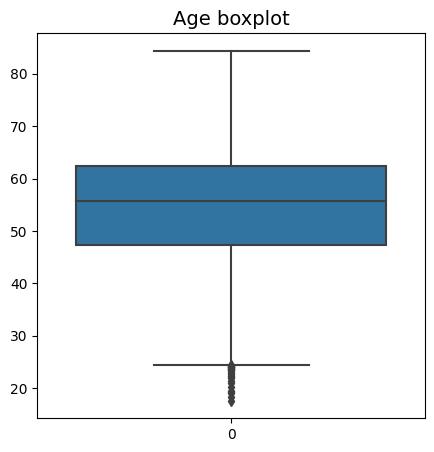

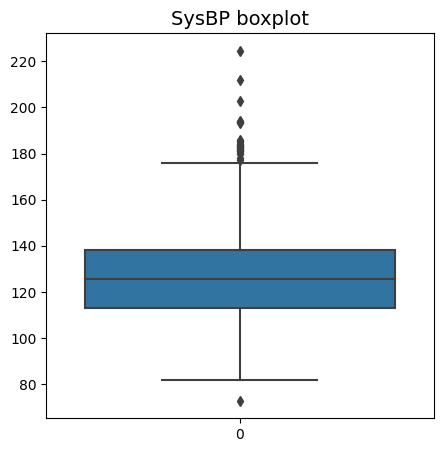

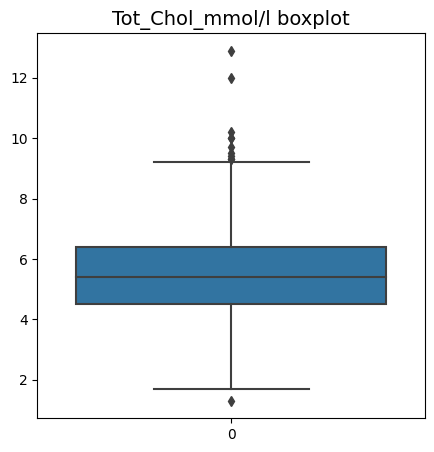

In [9]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=Brunei_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

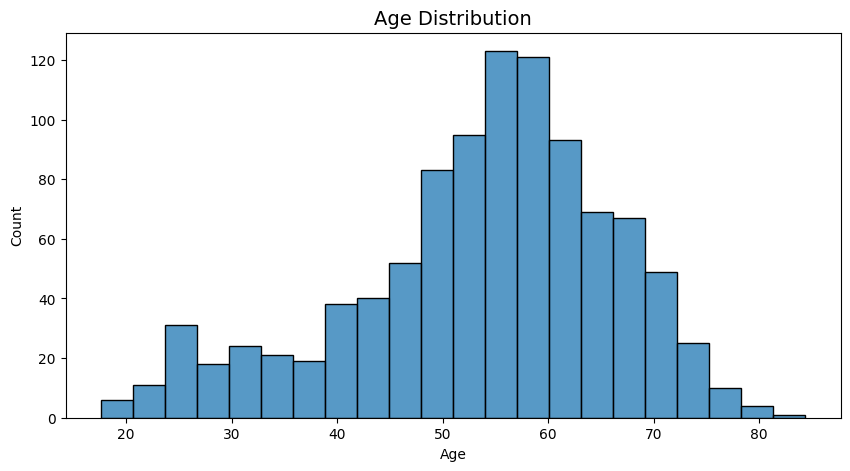

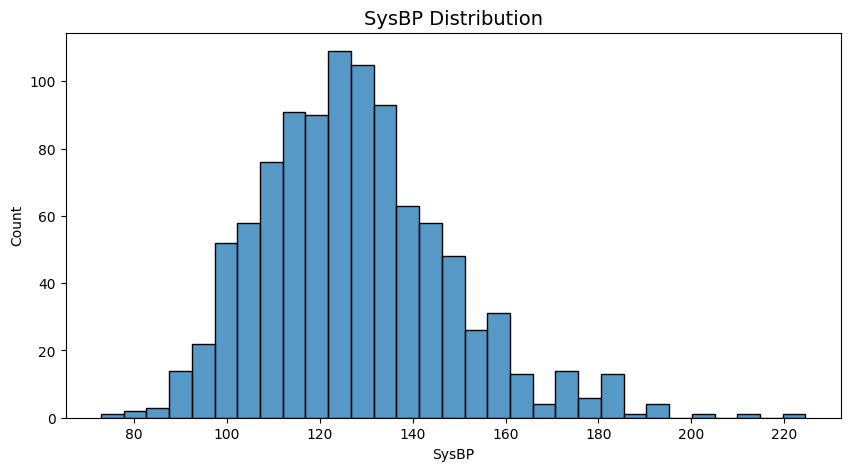

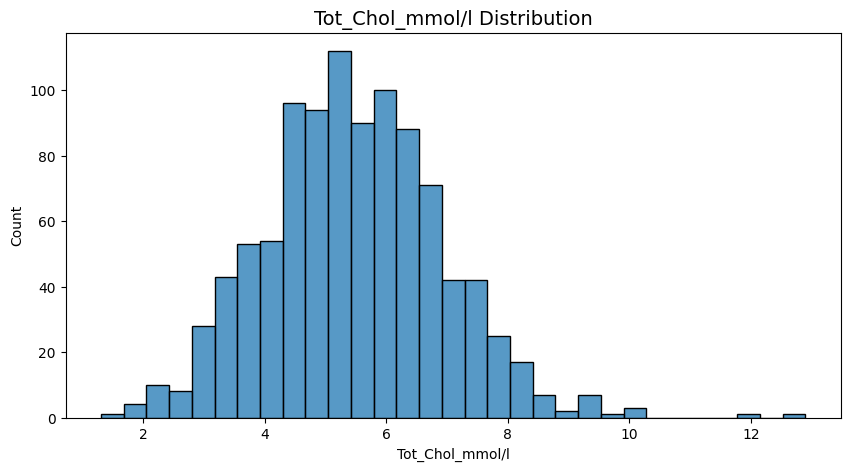

In [10]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Brunei_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age, Systolic blood pressure "SysBP" distribution and total cholesterol distribution are almost normal with slight  skewness.

#### Categorical Features

In [11]:
# Checking the brief statistical properities of the categorical variables in the dataset
categorical_features = ['Gender', 'Diabetes', 'Smoking', 'CVD risk']
for feature in categorical_features:
    print(feature,':')
    print(Brunei_df[feature].value_counts())
    print("-----------------")

Gender :
1    682
2    318
Name: Gender, dtype: int64
-----------------
Diabetes :
0    973
1     27
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    749
1    251
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    977
1     23
Name: CVD risk, dtype: int64
-----------------


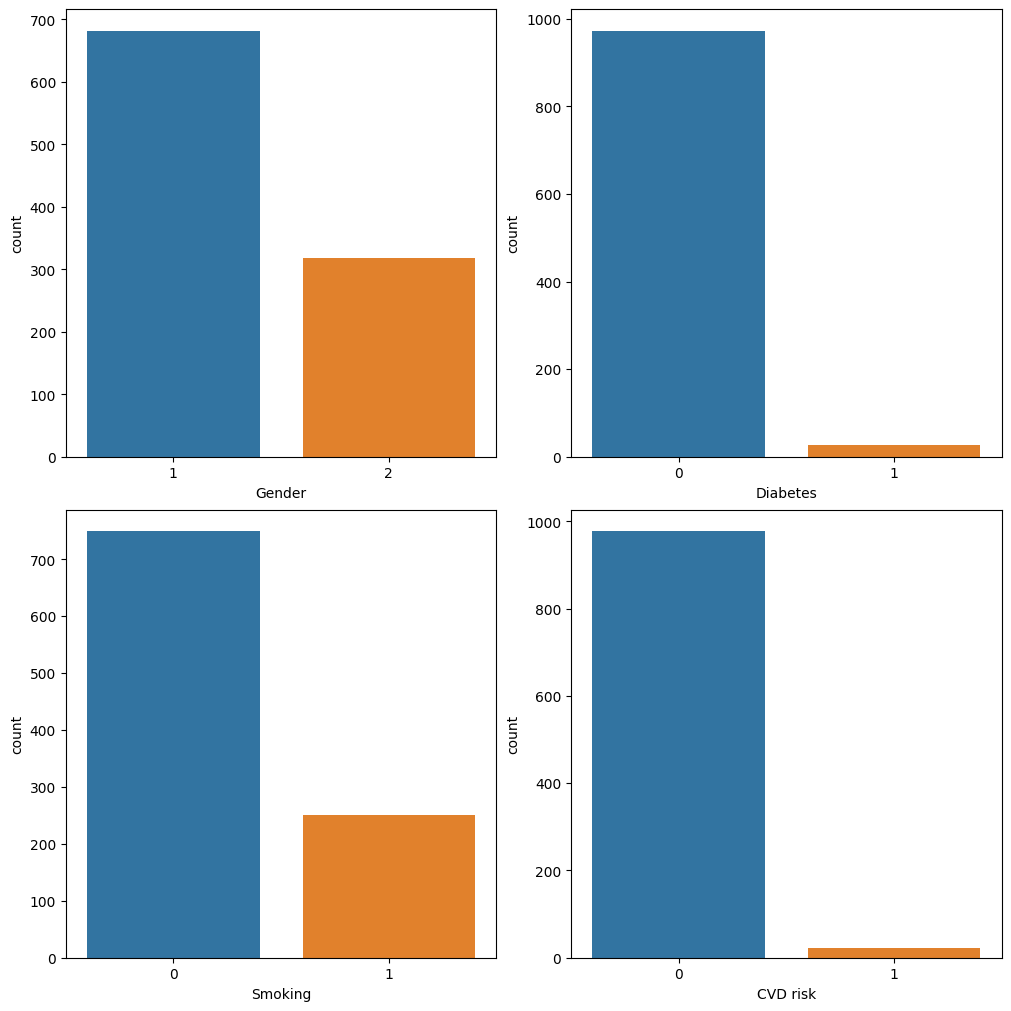

In [12]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Brunei_df, ax=axs[row][pos])

Among the categorical features:
* `Gender` and `Smoking` are slighlty imbalanced.
* `Diabetes` is highly imbalanced.
* The target labl `CVD risk` is also showing high class imbalance.

#### Target Variable

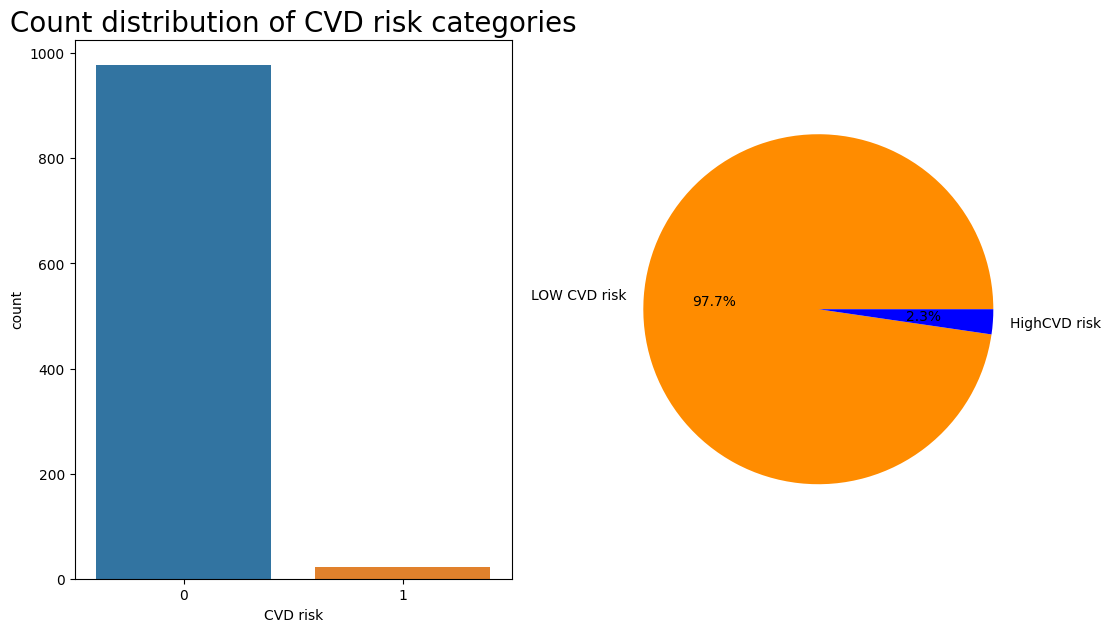

In [13]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(7, 7), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="CVD risk", data=Brunei_df)
plt.title("Count distribution of CVD risk categories", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(Brunei_df["CVD risk"].value_counts(),autopct="%1.1f%%",labels=['LOW CVD risk', 'HighCVD risk'],colors=["darkorange","blue"])
plt.show()

In [14]:
Brunei_df.to_csv('Brunei_validation_dataset.csv')

#### *Exploratory Data analysis will be applied in the next notebook*